In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import numpy
from tensorflow.python.framework.ops import disable_eager_execution
from sklearn.decomposition import PCA



In [2]:
disable_eager_execution()

# Carga datos

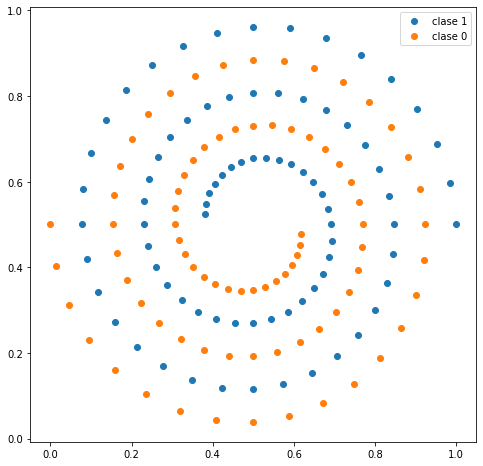

In [33]:
def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.
    """
    φ = math.pi*i/(16)  
    r = 6.5 * ((104 - i)/(104))
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return (x, y)

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(80)]


a_x = list(zip(*spiral(1)))[0]
a_y = list(zip(*spiral(1)))[1]

b_x = list(zip(*spiral(-1)))[0]
b_y = list(zip(*spiral(-1)))[1]

plt.figure(figsize=(8, 8))

plt.scatter(a_x,a_y, label = 'clase 1')
plt.scatter(b_x,b_y,  label = 'clase 0')
plt.legend()
plt.show()

In [34]:
data_class_1 = [[x,y,1] for x,y in spiral(1)]
data_class_0 = [[x,y,0] for x,y in spiral(-1)]
data = data_class_1+data_class_0
data_df =pd.DataFrame(data)
data_df = data_df.sample(frac=1).reset_index(drop=True)
x, y  = data_df.iloc[:,:-1],data_df.iloc[:,-1]


In [35]:
#x[2] = x[0].apply(lambda a: math.sin(a))
#x[3] = x[1].apply(lambda a: math.sin(a))
x

,0,1
0,0.200191,0.700326
1,0.500000,0.346154
2,0.593485,0.639911
3,0.155782,0.568469
4,0.560966,0.806495
...,...,...
155,0.404813,0.595187
156,0.331214,0.430087
157,0.953056,0.687662
158,0.356494,0.846455


# Entrenamiento

In [ ]:


# Fijamos la semilla para que no varie nuestro modelo de un entranamiento a otro
tf.random.set_seed(0)
optimizer = keras.optimizers.Adam(learning_rate=0.005)
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=1000, restore_best_weights=True)
model = keras.Sequential([

    layers.Dense(units=20, activation='relu', input_shape=[2]),
    layers.Dense(units=20, activation='relu'),
    layers.Dense(units=15, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=5, activation='relu'),
    layers.Dense(units=5, activation='relu'),


    layers.Dense(units=1,activation = 'sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'],experimental_run_tf_function=False)

history = model.fit(
    x,y ,
    batch_size=30,
    epochs=1200,
    callbacks = [es],
    verbose=1, # hide the output because we have so many epochs
)

history_df = pd.DataFrame(history.history)


Train on 160 samples
Epoch 1/1200
160/160 [==============================] - 0s 2ms/sample - loss: 0.6934 - accuracy: 0.4625
Epoch 2/1200
160/160 [==============================] - 0s 117us/sample - loss: 0.6933 - accuracy: 0.4750
Epoch 3/1200
160/160 [==============================] - 0s 108us/sample - loss: 0.6932 - accuracy: 0.4625
Epoch 4/1200
160/160 [==============================] - 0s 111us/sample - loss: 0.6931 - accuracy: 0.5312
Epoch 5/1200
160/160 [==============================] - 0s 139us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 6/1200
160/160 [==============================] - 0s 107us/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 7/1200
160/160 [==============================] - 0s 121us/sample - loss: 0.6931 - accuracy: 0.5188
Epoch 8/1200
160/160 [==============================] - 0s 112us/sample - loss: 0.6930 - accuracy: 0.5625
Epoch 9/1200
160/160 [==============================] - 0s 95us/sample - loss: 0.6932 - accuracy: 0.4938
Epoch 10/1200
160/160 [=====

In [ ]:
accuracy = model.evaluate(x, y)[1]
layers_numbers = len(model.layers)
model_path = f'{layers_numbers}_layers_{accuracy:.2f}_accuracy.h5'
model_path

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


'9_layers_0.94_accuracy.h5'

In [ ]:
model.save(model_path)


In [8]:
model = keras.models.load_model('/content/drive/MyDrive/TFM Zumaquero (MAT)/9_layers_1.00_accuracy.h5')


http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.73263&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false


In [9]:
def get_layers_output(model,data):

  inp = model.input                                           
  outputs = [layer.output for layer in model.layers]          
  functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs] 

  layer_outs = [func([x, 1.]) for func in functors]
  return layer_outs






In [10]:
layer_outs = get_layers_output(model,x)

In [11]:
layer_1 = layer_outs[0]
layer_2 = layer_outs[1]
layer_3 = layer_outs[2]
layer_4 = layer_outs[3]
layer_5 = layer_outs[4]
layer_6 = layer_outs[5]
layer_7 = layer_outs[6]
layer_8 = layer_outs[7]



In [12]:
def visualize_layer_2D(layer, y):

  mask_1 = [i == 1 for i in y]
  mask_0 = [i == 0 for i in y]
  l_2 = list(map(list, zip(*layer)))
  layer_2_data = [row[0] for row in l_2]
  pca = PCA(n_components=2).fit(layer_2_data)
  new_data = pca.transform(layer_2_data)
  new_data_1 = new_data[mask_1]
  new_data_0 = new_data[mask_0]
  plt.scatter(new_data_1[:,0], new_data_1[:,1], label = 'Clase 1')
  plt.scatter(new_data_0[:,0], new_data_0[:,1], label = 'Clase 2')
  plt.legend()
  plt.show()
  print(pca.explained_variance_ratio_)
  return None


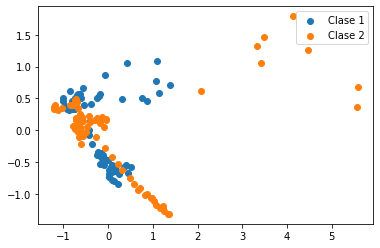

[0.71877909 0.20399516]


In [24]:
visualize_layer_2D(layer_4,y)

In [25]:
def visualize_layer_3D(layer, y):
  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(projection='3d')
  mask_1 = [i == 1 for i in y]
  mask_0 = [i == 0 for i in y]
  l = list(map(list, zip(*layer)))
  layer_1_data = [row[0] for row in l]
  pca = PCA(n_components=3).fit(layer_1_data)
  new_data = pca.transform(layer_1_data)
  new_data_1 = new_data[mask_1]
  new_data_0 = new_data[mask_0]
  ax.scatter(new_data_1[:,0], new_data_1[:,1],new_data_1[:,2], label = 'Clase 1')
  ax.scatter(new_data_0[:,0], new_data_0[:,1],new_data_0[:,2], label = 'Clase 8')
  plt.legend()
  plt.savefig('layer.jpg')
  plt.show()
  print('explained_variance:',pca.explained_variance_ratio_)
  print('explained_cumulative_variance:',pca.explained_variance_ratio_.sum())


  return None

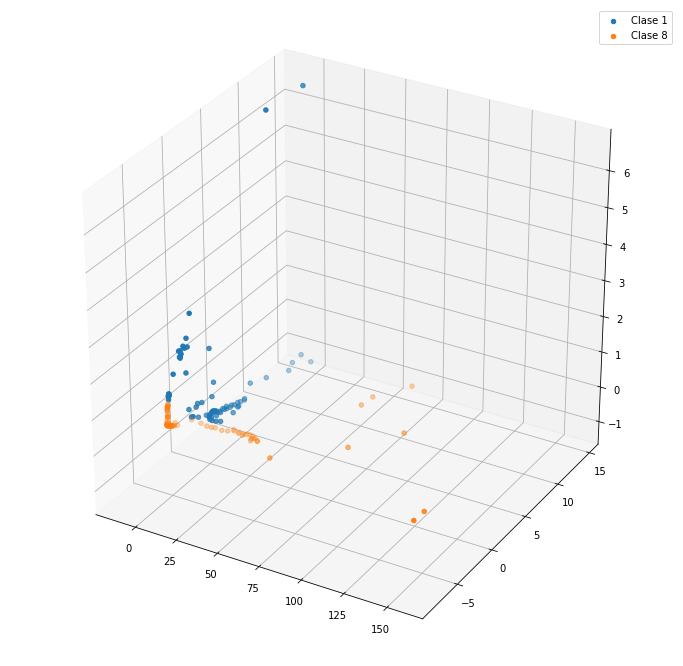

explained_variance: [0.98006946 0.01815582 0.00131489]
explained_cumulative_variance: 0.9995401685478339


In [32]:
visualize_layer_3D(layer_8, y)

# Dataset digitos

In [ ]:
from sklearn.datasets import load_digits
#from keras.datasets import mnist
import pandas as pd

digits=load_digits(as_frame=True)
X = digits.data
Y = digits.target
X['target'] = Y


digits_mask = [i==8 or i==1 for i in Y]
digits_df = X.iloc[digits_mask]
digits_df['target'] = digits_df['target'].replace(8,0)
digits_df =digits_df.reset_index(drop =True)
x, y  =  digits_df.iloc[:,:-1],digits_df.iloc[:,-1]
x.shape

In [ ]:
layer_outputs_digits = get_layers_output(model, x)

layer_digit_1  = layer_outputs_digits[0]
layer_digit_2  = layer_outputs_digits[1]
layer_digit_3  = layer_outputs_digits[2]
layer_digit_4  = layer_outputs_digits[3]


In [ ]:
visualize_layer_3D(x, y)